In [ ]:
## ref coco api notebook: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb
!pip install pycocotools

In [ ]:
# download annotation files
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

In [ ]:
!unzip annotations_trainval2017.zip

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='.'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.75s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush



In [37]:
# get all images containing given categories, select one at random
# catIds = coco.getCatIds(catNms=['person','dog','cat', 'bear']);
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds); ## shoot: only one cat id can get imgIds.
images = coco.loadImgs(imgIds)

In [38]:
len(images)

2693

In [42]:
images[1]

{'license': 1,
 'file_name': '000000458755.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000458755.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-16 23:06:51',
 'flickr_url': 'http://farm6.staticflickr.com/5119/5878453277_eea657a01d_z.jpg',
 'id': 458755}

In [39]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

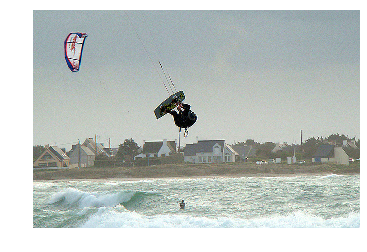

In [40]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [12]:
img['coco_url']

'http://images.cocodataset.org/val2017/000000323496.jpg'

In [14]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

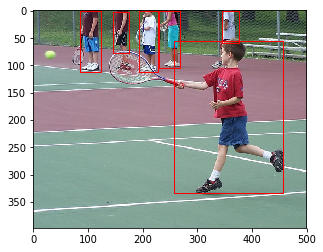

In [18]:
plt.imshow(I)

for i in range(len(anns)):
    xmin = anns[i]["bbox"][0]
    ymin = anns[i]["bbox"][1]
    xmax = anns[i]["bbox"][2] + anns[i]["bbox"][0]
    ymax = anns[i]["bbox"][3] + anns[i]["bbox"][1]
#     print('xmin:{} ymin:{} xmax:{} ymax:{}'.format(xmin, ymin, xmax, ymax))
    left, top, width, height = xmin, ymin, xmax-xmin, ymax-ymin
    bbox = plt.Rectangle((left, top), width, height, fill=False, edgecolor=(1,0,0), linewidth=1)
    plt.gca().add_patch(bbox)
    
plt.show()

## Yolo format

1. Yolo annotation is normalized by width and height of image.
2. `<object-class> <x_center> <y_center> <width> <height>`
3. `<x> = <absolute_x> / <image_width> or <height> = <absolute_height> / <image_height>`
3. example: `1 0.716797 0.395833 0.216406 0.147222`

In [20]:
width = img['width']
height = img['height']
print(width, height)

500 398


In [23]:
dw = 1. / img['width']
dh = 1./ img['height']
for i in range(len(anns)):
    xmin = anns[i]["bbox"][0]
    ymin = anns[i]["bbox"][1]
    xmax = anns[i]["bbox"][2] + anns[i]["bbox"][0]
    ymax = anns[i]["bbox"][3] + anns[i]["bbox"][1]
    print('xmin:{} ymin:{} xmax:{} ymax:{}'.format(xmin, ymin, xmax, ymax))
    x, y, w, h = (xmin+xmax)/2*dw, (ymin+ymax)*dh, (xmax-xmin)*dw, (ymax-ymin)*dh
    output = f"{x:.5f} {y:.5f} {w:.5f} {h:.5f}"
    print(output)

xmin:230.0 ymin:1.57 xmax:268.63 ymax:104.88999999999999
0.49863 0.26749 0.07726 0.25960
xmin:192.45 ymin:1.19 xmax:227.22 ymax:111.46
0.41967 0.28304 0.06954 0.27706
xmin:85.87 ymin:0.2 xmax:122.98 ymax:111.66
0.20885 0.28106 0.07422 0.28005
xmin:145.22 ymin:2.24 xmax:175.69 ymax:76.64
0.32091 0.19819 0.06094 0.18693
xmin:344.44 ymin:0.0 xmax:376.76 ymax:59.04
0.72120 0.14834 0.06464 0.14834
xmin:256.43 ymin:56.18 xmax:455.87 ymax:333.98
0.71230 0.98030 0.39888 0.69799


In [26]:
((230.0+268.63)/2)/img['width']

0.49863

In [27]:
len(img)

8